In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Employee Attrition.csv')

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Identify missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Remove duplicate rows
df = df.drop_duplicates()

# Replace specific values in categorical columns (example replacements)
df.replace({'Yes': 1, 'No': 0}, inplace=True)

# Fill missing values
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].fillna(df['EnvironmentSatisfaction'].mode()[0])
df['YearsAtCompany'] = df['YearsAtCompany'].fillna(df['YearsAtCompany'].mean())

# Convert numeric columns, forcing errors to NaN (example for one column)
df['MonthlyIncome'] = pd.to_numeric(df['MonthlyIncome'], errors='coerce')

Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

<ipython-input-1-3819665b6b68>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0}, inplace=True)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [3]:
from sklearn.preprocessing import StandardScaler

# Selecting only numerical columns for clustering
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
                     'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                     'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                     'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])


Silhouette Score for K-Means: 0.12253496535383031


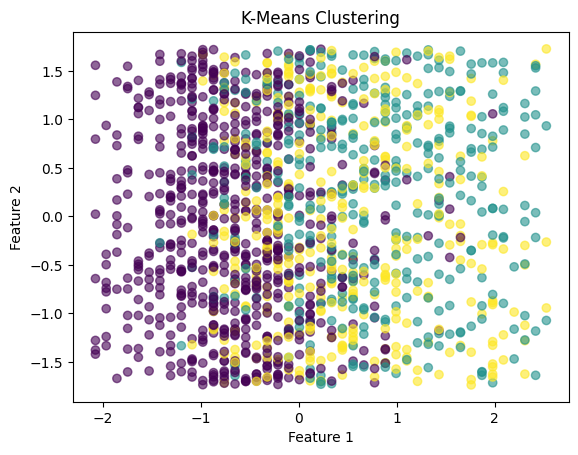

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Performing K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Adding cluster labels to the original dataframe
df['KMeans_Cluster'] = kmeans_labels

# Silhouette Score
silhouette_avg = silhouette_score(scaled_data, kmeans_labels)
print(f"Silhouette Score for K-Means: {silhouette_avg}")

# Visualizing the K-Means clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


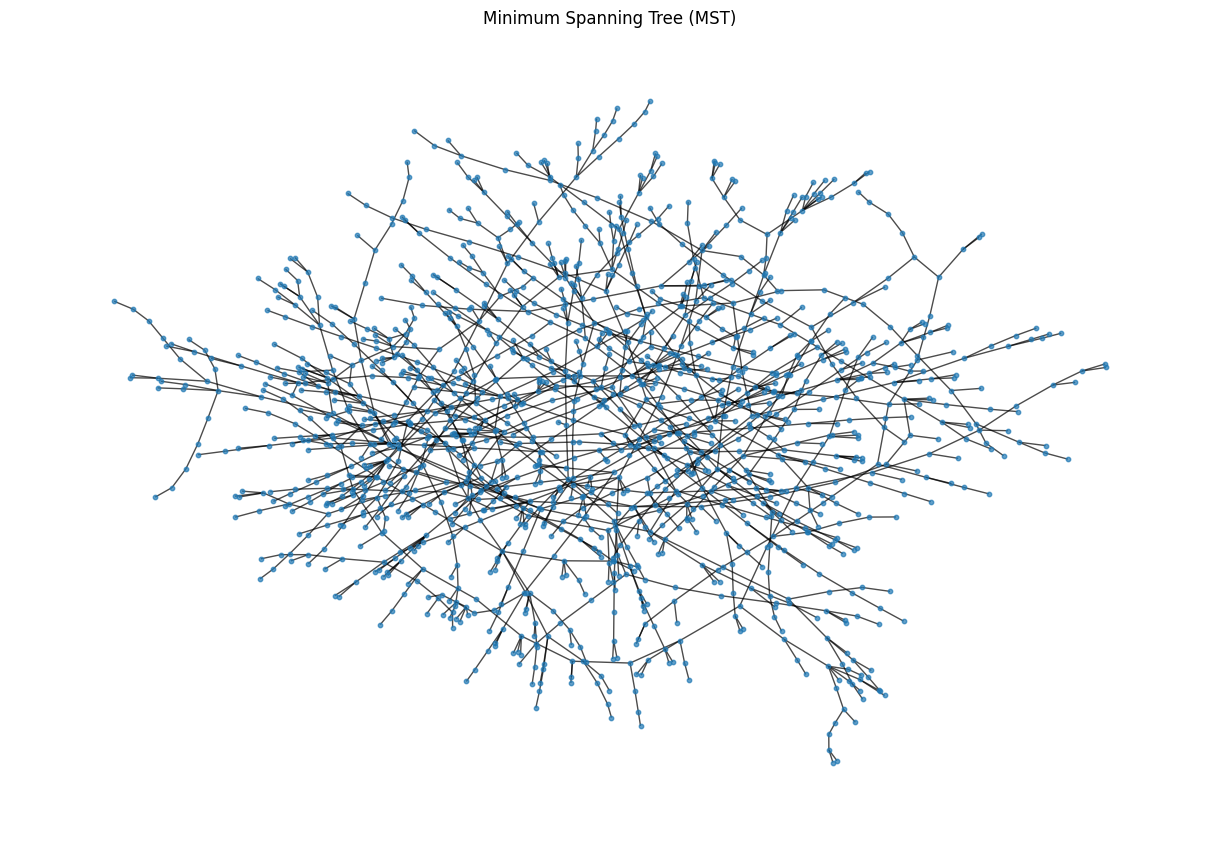

In [5]:
import networkx as nx
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.csgraph import minimum_spanning_tree

# Calculating the distance matrix
distance_matrix = squareform(pdist(scaled_data))

# Computing the MST
mst = minimum_spanning_tree(distance_matrix).toarray()

# Visualizing the MST as a graph
graph = nx.Graph(mst)
plt.figure(figsize=(12, 8))
nx.draw(graph, with_labels=False, node_size=10, alpha=0.7)
plt.title("Minimum Spanning Tree (MST)")
plt.show()


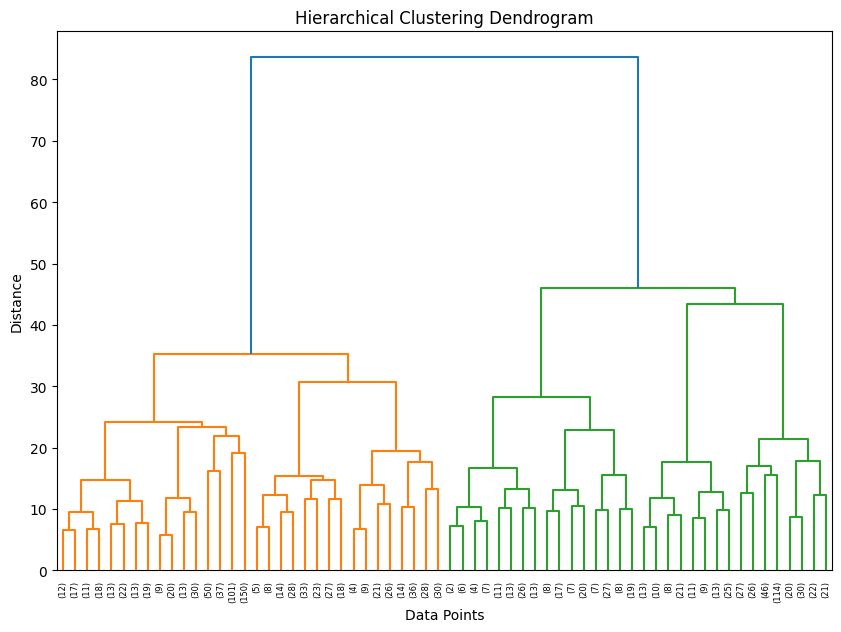

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Performing hierarchical clustering
linkage_matrix = linkage(scaled_data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


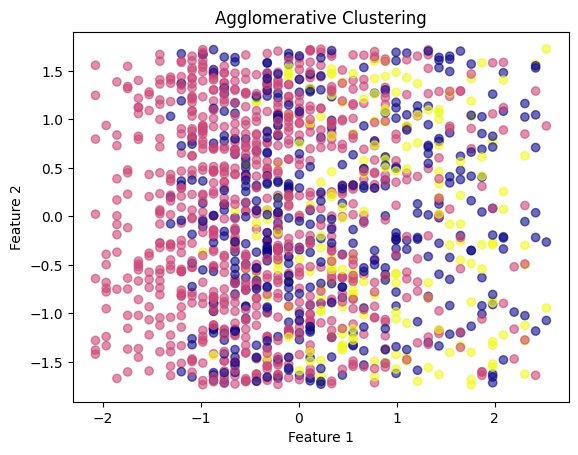

In [11]:
from sklearn.cluster import AgglomerativeClustering

# Performing Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(scaled_data)

# Adding cluster labels to the original dataframe
df['Agglomerative_Cluster'] = agg_labels

# Visualizing the Agglomerative clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=agg_labels, cmap='plasma', alpha=0.6)
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


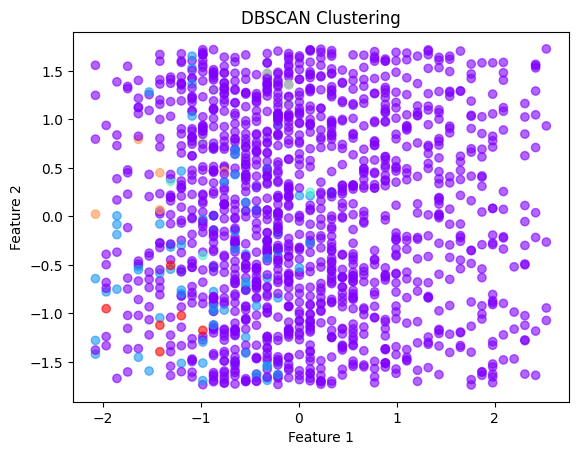

Number of noise points: 1367


In [9]:
from sklearn.cluster import DBSCAN

# Performing DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Adding cluster labels to the original dataframe
df['DBSCAN_Cluster'] = dbscan_labels

# Visualizing the DBSCAN clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='rainbow', alpha=0.6)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Checking the number of noise points
noise_points = sum(dbscan_labels == -1)
print(f"Number of noise points: {noise_points}")


In [12]:
print(df[['KMeans_Cluster', 'Agglomerative_Cluster', 'DBSCAN_Cluster']].head())


   KMeans_Cluster  Agglomerative_Cluster  DBSCAN_Cluster
0               1                      1              -1
1               2                      0              -1
2               1                      1              -1
3               0                      1              -1
4               1                      1              -1
